# CMSIS-DSP Python package example

## Installing and importing the needed packages

Installation below may generate an error in google colab. It is related to conflicting versions of the Jinja2 package. It will not prevent the use of the cmsisdsp package in google colab.

In [1]:
!pip install cmsisdsp

In [2]:
import numpy as np
import cmsisdsp as dsp

In [3]:
import matplotlib.pyplot as plt

## Creating the signal

In [17]:
nb = 512
f=100
signal = np.sin(2 * np.pi * np.arange(nb)*f / nb) + 0.1*np.random.randn(nb)

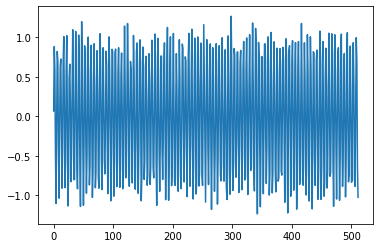

In [18]:
plt.plot(signal)
plt.show()

In [10]:
# Array of complex numbers as an array of real numbers
def imToReal1D(a):
    ar=np.zeros(np.array(a.shape) * 2)
    ar[0::2]=a.real
    ar[1::2]=a.imag
    return(ar)

# Array of real numbers as an array of complex numbers
def realToIm1D(ar):
    return(ar[0::2] + 1j * ar[1::2])

## Using the F32 CMSIS-DSP FFT

In [11]:
# CMSIS-DSP FFT F32 initialization
cfftf32=dsp.arm_cfft_instance_f32()
status=dsp.arm_cfft_init_f32(cfftf32,nb)
print(status)

0


In [19]:
# Re-evaluate this each time you change the signal
signalR = imToReal1D(signal)
resultR = dsp.arm_cfft_f32(cfftf32,signalR,0,1)
resultI = realToIm1D(resultR)
mag=20 * np.log10(np.abs(resultI))

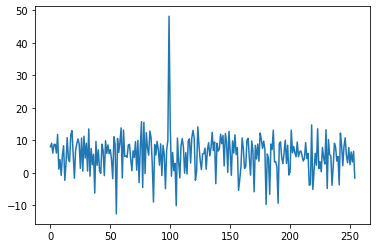

In [20]:
plt.plot(mag[1:nb//2])
plt.show()

## Using the Q15 CMSIS-DSP FFT

In [21]:
# Convert the signal to Q15 and viewed as a real array
import cmsisdsp.fixedpoint as f
signalR = imToReal1D(signal)
signalRQ15 = f.toQ15(signalR)

In [22]:
# Initialize the Q15 CFFT
cfftq15 = dsp.arm_cfft_instance_q15()
status = dsp.arm_cfft_init_q15(cfftq15,nb)
print(status)

0


In [23]:
# Compute the Q15 CFFT and convert back to float and complex array
resultR = dsp.arm_cfft_q15(cfftq15,signalRQ15,0,1)
resultR = f.Q15toF32(resultR)
resultI = realToIm1D(resultR)*nb

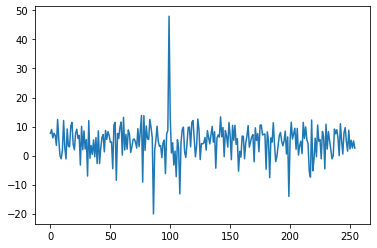

In [24]:
mag = 20 * np.log10(np.abs(resultI))
plt.plot(mag[1:nb//2])
plt.show()